# Install Segment Anything

In [1]:
pip install git+https://github.com/facebookresearch/segment-anything.git

  Cloning https://github.com/facebookresearch/segment-anything.git to c:\users\david\appdata\local\temp\pip-req-build-sib7nofr
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git 'C:\Users\david\AppData\Local\Temp\pip-req-build-sib7nofr'

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import torchvision

In [3]:
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())


PyTorch version: 2.1.1+cu118
Torchvision version: 0.16.1+cu118
CUDA is available: True


In [4]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [5]:
image = cv2.imread('images/57260-768.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

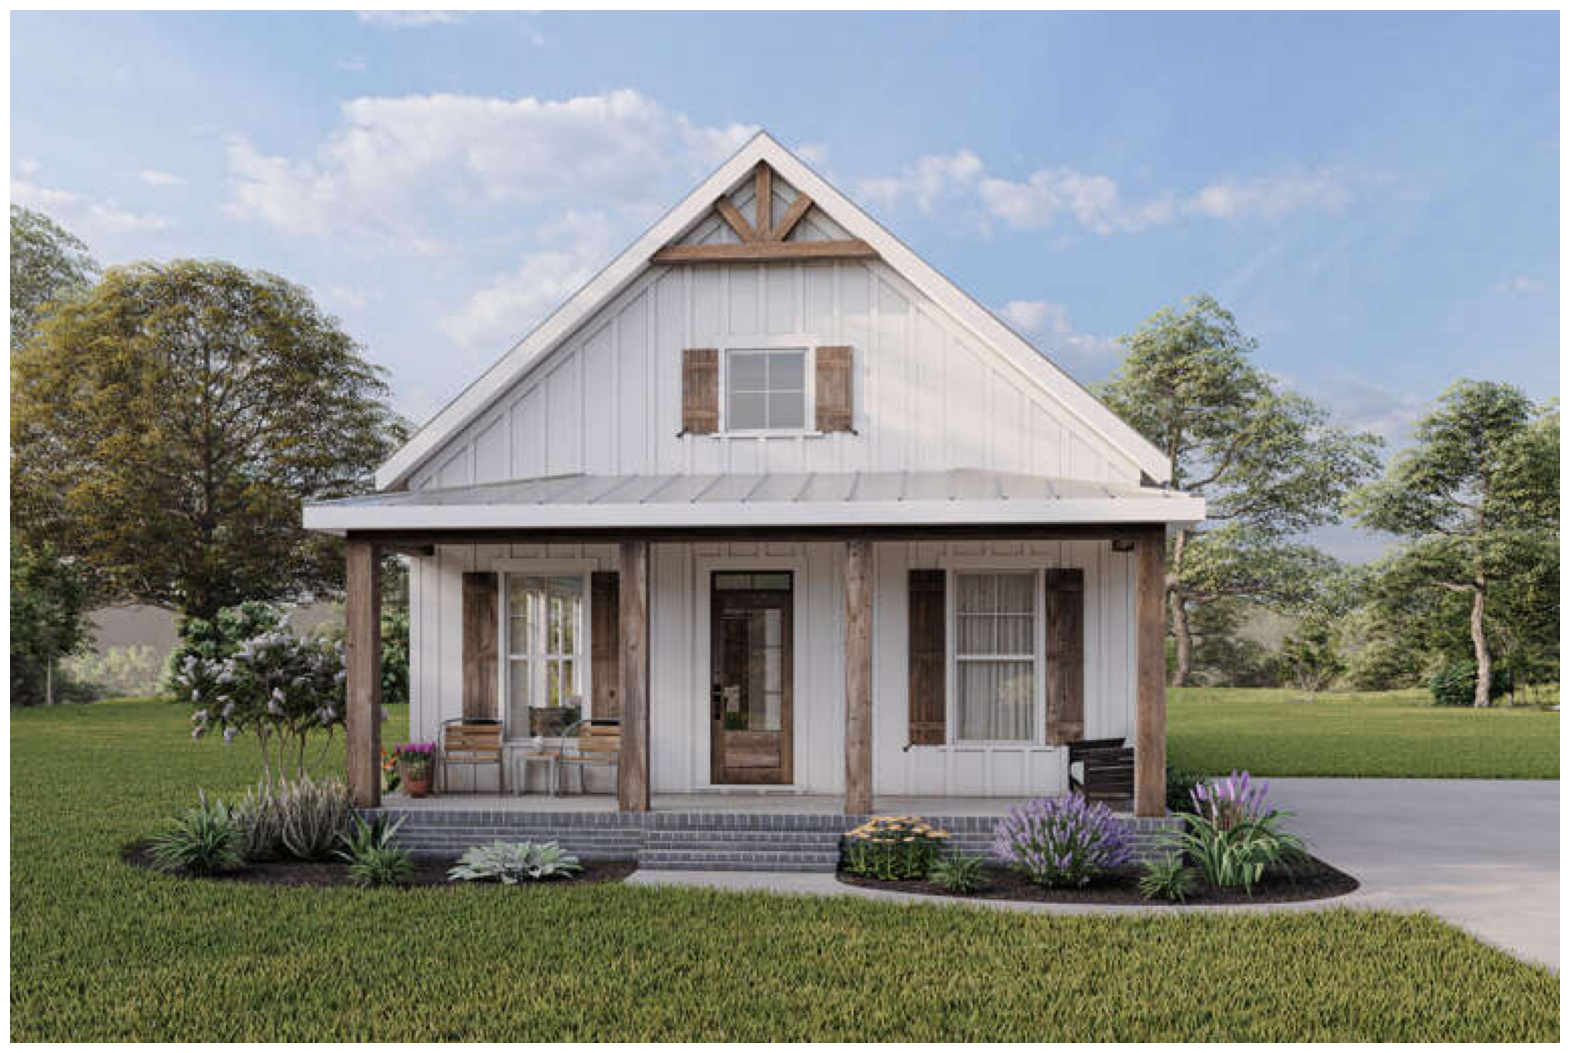

In [6]:
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')
plt.show()

In [7]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [8]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

In [47]:
# mask_generator_2 = SamAutomaticMaskGenerator(
#     model=sam,
#     points_per_side=32,
#     pred_iou_thresh=0.90,
#     stability_score_thresh=0.96,
#     crop_n_layers=1,
#     crop_n_points_downscale_factor=2,
#     min_mask_region_area=100,  # Requires open-cv to run post-processing
# )

In [9]:
masks = mask_generator.generate(image)

In [48]:
# masks2 = mask_generator_2.generate(image)

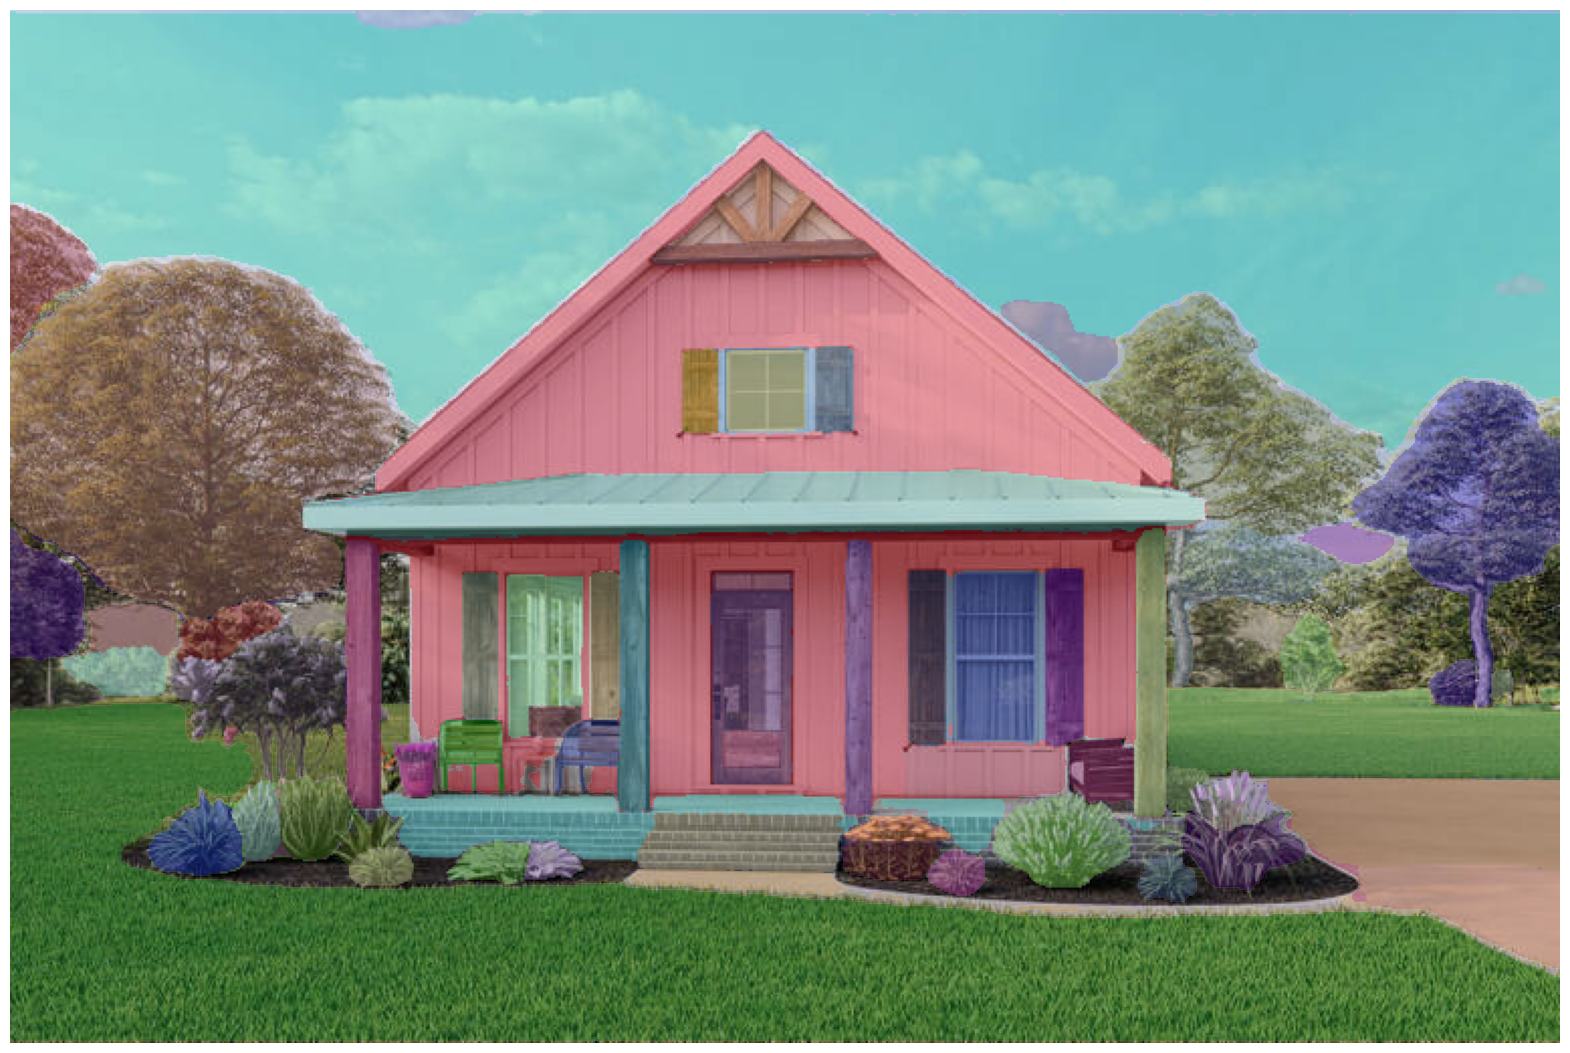

In [11]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
#plt.savefig('mask_images/masks_with_defaults.png') 
plt.show()

In [33]:
print("Number of Masks: " , len(masks))
print(masks[0].keys())
print(masks[2]['bbox'])

Number of Masks:  77
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])
[146, 61, 446, 338]


In [14]:
# # Save all masks
# import os
# for i in range(len(masks)):
#     x, y, width, height = masks[i]['bbox']
#     cropped_image = image[int(y):int(y+height), int(x):int(x+width)]
#     filename = os.path.join('mask_images/', str(i) + '.png')
#     cv2.imwrite(filename, cropped_image)

In [ ]:
from matplotlib.patches import Polygon

# Function to check if a point is inside a bounding box
def point_inside_bbox(point, bbox):
    x, y = point
    x_topleft, y_topleft, width, height = bbox
    x_topright = x_topleft + width
    # y_topright = y_topleft
    x_bottomleft = x_topleft
    y_bottomleft = y_topleft - height
    x_bottomright = x_topright
    # y_bottomright = y_bottomleft
    return x_bottomleft <= x <= x_bottomright and y_bottomleft <= y <= y_topleft

    

# Function to find the mask containing the given coordinates
# Loosely tested, may have problems later
def find_mask(coord):
    masks = mask_generator.generate(image)
    for i, masks in enumerate(masks, start=0):
        if point_inside_bbox(coord, masks['bbox']):
            return i
    return None

sample_coord = (147,50)

print(point_inside_bbox(sample_coord, masks[1]['bbox']))
print(find_mask(sample_coord))

False
2


In [10]:
pip install pynput

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


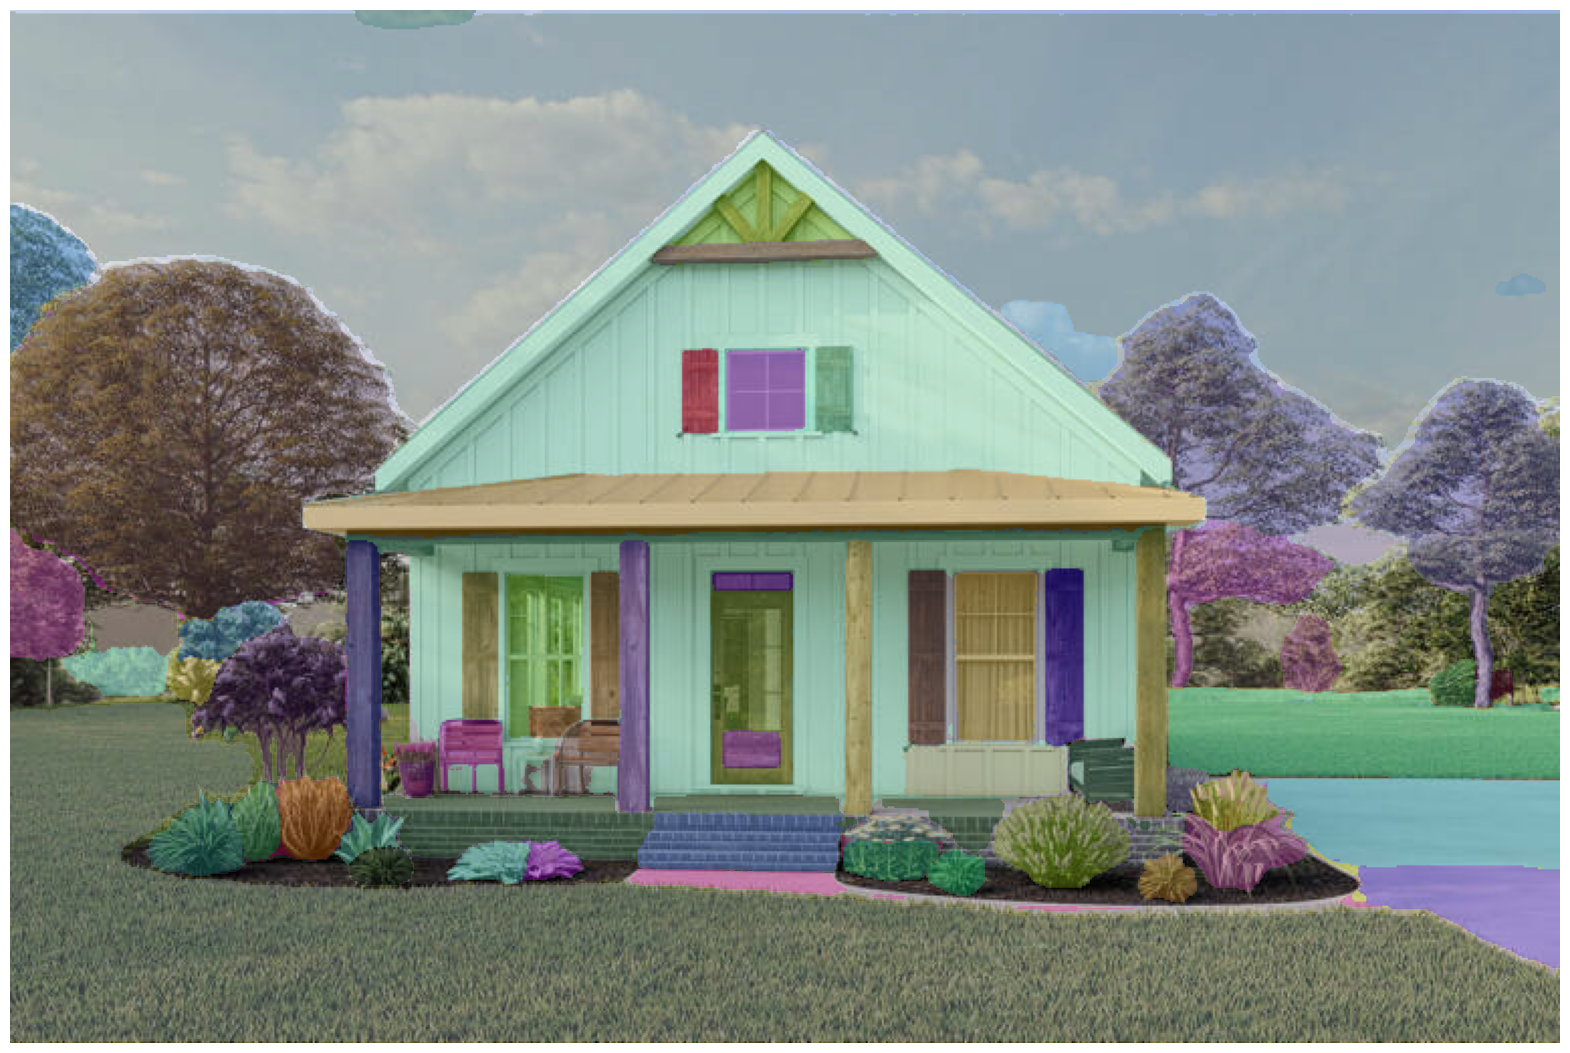

x=121 and y=284
x=121 and y=462
x=112 and y=375
x=99 and y=520
x=24 and y=520
x=2 and y=516
x=86 and y=234
x=69 and y=219
x=286 and y=633
x=1196 and y=543
x=-409 and y=71
x=-1003 and y=419
x=-1293 and y=88
x=-1040 and y=366
x=-1038 and y=351
x=-1657 and y=69
x=-985 and y=611
x=-1181 and y=274
x=2430 and y=981
x=81 and y=217
x=1791 and y=1052
x=1749 and y=963


In [11]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
#plt.savefig('mask_images/masks_with_defaults.png') 
plt.show()

from pynput.mouse import Listener, Button

# When user clicks on the screen, get the coordinates and find which mask the user clicked.
# Installed pynput
# Function called on a mouse click
def on_click(x, y, button, pressed):
    # Check if the left button was pressed
    if pressed and button == Button.left:
        # Print the click coordinates
        print(f'x={x} and y={y}')


# Initialize the Listener to monitor mouse clicks
with Listener(on_click=on_click) as listener:
    listener.join()